<a href="https://colab.research.google.com/github/rladudwnss/CNN_Classification-flying-object/blob/main/classification_usingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터셋을 가져오기 위해 구글 드라이브를 마운트 한다.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**해당 코드로 데이터셋이 존재하는 경로를 가져온다**

In [2]:
import os
import shutil
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/gdrive/My Drive/project_cnn/classification_img.zip'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/gdrive/My Drive/project_cnn/datasets'

In [3]:
import os
import shutil
#original_dataset_dir = '/content/gdrive/MyDrive/project_cnn/classification_img' #이미지 크기 resize하지 않은 데이터셋 경로
#original_dataset_dir = '/content/gdrive/MyDrive/project_cnn/split_img' #이미지 크기 resize하지 않은 데이터셋 경로
original_dataset_dir = '/content/gdrive/MyDrive/project_cnn/modified_dataset' #원본 데이터셋 압축 해제한 디렉터리 경로(이미지 크기 rsize하였음, 256x256)
base_dir = '/content/gdrive/MyDrive/project_cnn/modified_dataset'  #소규모 데이터셋을 저장할 디렉토리

#train, validation, test 경로의 폴더명을 주의해서 파라미터로 넣어준다.
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# 훈련용 새 사진 디렉터리
train_bird_dir = os.path.join(train_dir, 'bird')
# 훈련용 드론 사진 디렉터리
train_drone_dir = os.path.join(train_dir, 'drone')
# 훈련용 비행기 사진 디렉터리
train_plane_dir = os.path.join(train_dir, 'plane')

# 검증용 새 사진 디렉터리
validation_bird_dir = os.path.join(validation_dir, 'bird')
# 검증용 드론 사진 디렉터리
validation_drone_dir = os.path.join(validation_dir, 'drone')
# 검증용 비행기 사진 디렉터리
validation_plane_dir = os.path.join(validation_dir, 'plane')

# 테스트용 새 사진 디렉터리
test_bird_dir = os.path.join(test_dir, 'bird')
# 테스트용 드론 사진 디렉터리
test_dropne_dir = os.path.join(test_dir, 'drone')
# 테스트용 비행기 사진 디렉터리
test_plane_dir = os.path.join(test_dir, 'plane')

In [4]:
base_dir = '/content/gdrive/MyDrive/project_cnn/modified_dataset'  #이미지 사이즈가 resize된 데이터 경로
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_bird_dir = os.path.join(train_dir, 'bird')
train_drone_dir = os.path.join(train_dir, 'drone')
train_plane_dir = os.path.join(train_dir, 'plane')


validation_bird_dir = os.path.join(validation_dir, 'bird')
validation_drone_dir = os.path.join(validation_dir, 'drone')
validation_plane_dir = os.path.join(validation_dir, 'plane')


test_bird_dir = os.path.join(test_dir, 'bird')
test_drone_dir = os.path.join(test_dir, 'drone')
test_plane_dir = os.path.join(test_dir, 'plane')

print('훈련용 새 이미지 전체 개수:', len(os.listdir(train_bird_dir)))
print('훈련용 드론 이미지 전체 개수:', len(os.listdir(train_drone_dir)))
print('훈련용 비행기 이미지 전체 개수:', len(os.listdir(train_plane_dir)))
print('검증용 새 이미지 전체 개수: ', len(os.listdir(validation_bird_dir)))
print('검증용 드론 이미지 전체 개수: ', len(os.listdir(validation_drone_dir)))
print('검증용 비행기 이미지 전체 개수: ', len(os.listdir(validation_plane_dir)))
print('테스트용 새 이미지 전체 개수: ', len(os.listdir(test_bird_dir)))
print('테스트용 드론 이미지 전체 개수: ', len(os.listdir(test_drone_dir)))
print('테스트용 비행기 이미지 전체 개수: ', len(os.listdir(test_plane_dir)))

훈련용 새 이미지 전체 개수: 21
훈련용 드론 이미지 전체 개수: 21
훈련용 비행기 이미지 전체 개수: 21
검증용 새 이미지 전체 개수:  6
검증용 드론 이미지 전체 개수:  6
검증용 비행기 이미지 전체 개수:  6
테스트용 새 이미지 전체 개수:  3
테스트용 드론 이미지 전체 개수:  3
테스트용 비행기 이미지 전체 개수:  3


# **데이터셋의 이미지 사이즈를 알기위한 코드**

In [5]:
from PIL import Image
image1 = Image.open('/content/gdrive/MyDrive/project_cnn/modified_dataset/test/bird/bird_30.jpg')
image1.show()
image1_size = image1.size
print(image1_size)

(256, 256)


# **신경망 구축**

*   인풋 이미지 사이즈 = 256x256x3(chanel) 

*   활성화 함수 : ReLu

*   출력층 활성화 함수 : softmax 사용, why? categorical_crossentropy라는 손실 함수를 사용하기 때문





In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
#loss 방식은 categorical_crossentropy를 가져온다. optimizer는 RMSprop으로 가장 많이 쓰이는 방식으로 최적화를 진행한다.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
#loss 방식은 categorical_crossentropy를 가져온다. optimizer는 RMSprop으로 가장 많이 쓰이는 방식으로 최적화를 진행한다.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# **이미지 전처리**
이미지 사이즈를 256x256으로 변경한다


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,        # 타깃 디렉터리
        target_size=(256, 256),# 모든 이미지를 256 × 256 크기로
        batch_size=32,     # 배치사이즈에 따라 정확도가 다르기 때문에 잘 설정해야한다. 
        class_mode='categorical') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요하다

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 63 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break
    
for val_data_batch, val_labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

for test_data_batch, test_labels_batch in test_generator:
  print('배치 데이터 크기 : ', test_data_batch.shape)
  print('배치 레이블 크기 : ', test_labels_batch.shape)
  break

배치 데이터 크기: (32, 256, 256, 3)
배치 레이블 크기: (32, 3)
배치 데이터 크기: (32, 256, 256, 3)
배치 레이블 크기: (32, 3)
배치 데이터 크기 :  (9, 256, 256, 3)
배치 레이블 크기 :  (9, 3)


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=2,
      epochs=70,
      validation_data=validation_generator,
      validation_steps=1)

Epoch 1/70
2/2 [==============================] - 10s 5s/step - loss: 1.0992 - acc: 0.6667 - val_loss: 1.0985 - val_acc: 0.6667
Epoch 2/70
2/2 [==============================] - 10s 5s/step - loss: 1.1013 - acc: 0.6667 - val_loss: 1.0974 - val_acc: 0.6667
Epoch 3/70
2/2 [==============================] - 9s 5s/step - loss: 1.1021 - acc: 0.6667 - val_loss: 1.0962 - val_acc: 0.6667
Epoch 4/70
2/2 [==============================] - 9s 5s/step - loss: 1.0955 - acc: 0.6667 - val_loss: 1.0942 - val_acc: 0.6667
Epoch 5/70
2/2 [==============================] - 9s 5s/step - loss: 1.0933 - acc: 0.6667 - val_loss: 1.0912 - val_acc: 0.6667
Epoch 6/70
2/2 [==============================] - 9s 5s/step - loss: 1.0877 - acc: 0.6667 - val_loss: 1.0864 - val_acc: 0.6667
Epoch 7/70
2/2 [==============================] - 9s 5s/step - loss: 1.0777 - acc: 0.6667 - val_loss: 1.0803 - val_acc: 0.6667
Epoch 8/70
2/2 [==============================] - 11s 5s/step - loss: 1.0821 - acc: 0.6667 - val_loss: 1.0751

In [ ]:
#history = model.fit(train_generator,steps_per_epoch=2, epochs=50, validation_data=validation_generator, validation_steps=1)

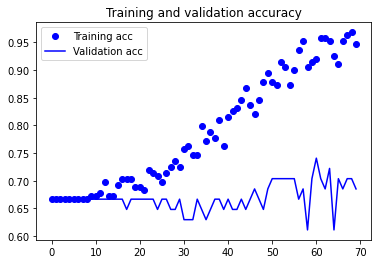

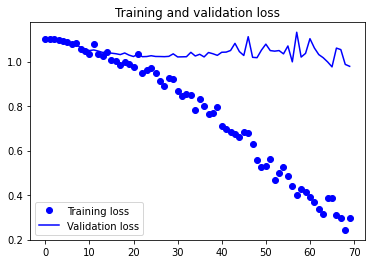

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

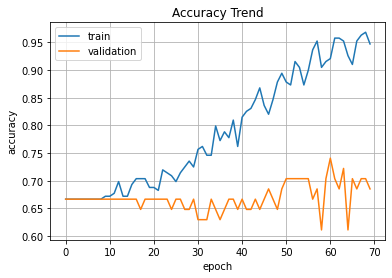

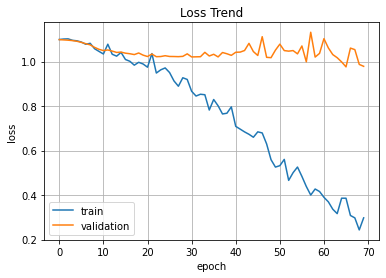

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [14]:
results = model.evaluate(test_data_batch)
print('Test accuracy: ', results[1])

1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Test accuracy:  0.0


# **모델파일 저장 부분**

In [22]:
model.save('classfication_fly_object.h5')

In [23]:
from google.colab import files
files.download('classfication_fly_object.h5')  # from colab to browser download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **예측**

In [54]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./multi_img_data/imgs_others_test"
img = image.load_img("/content/gdrive/MyDrive/project_cnn/modified_dataset/test/drone/drone_29.jpg")
image_w = 256
image_h = 256

pixels = image_h * image_w * 3

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

prediction = model.predict(images)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

pre_ans = prediction.argmax()
if pre_ans == 0: pre_ans_str = "bird"
elif pre_ans == 1: pre_ans_str = "drone"
elif pre_ans == 2: pre_ans_str = "plane"


if prediction[0,0] >= 0.8 : print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
if prediction[0,1] >= 0.8: print("해당 "+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
if prediction[0,2] >= 0.8: print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.

해당 이미지는 drone으로 추정됩니다.


# **Image Augmentation 부분**

In [58]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

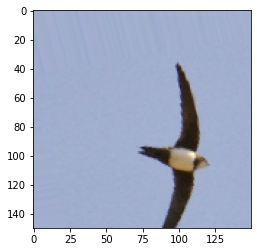

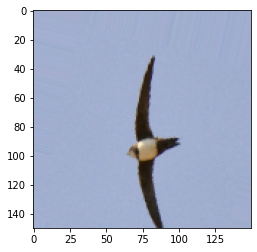

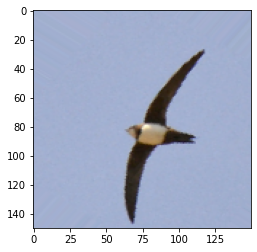

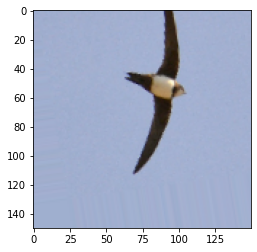

In [59]:
#이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_bird_dir, fname) for fname in os.listdir(train_bird_dir)])

#증식할 이미지 선택
img_path = fnames[3]

#이미지를 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

#(150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

#(1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

#flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성한다
#무한 반복되기 때문에 어느 지점에서 중지해야 한다
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# history = model.fit(
#       train_generator,
#       steps_per_epoch=4,
#       epochs=50,
#       validation_data=validation_generator)
history = model.fit(
      train_generator,
      steps_per_epoch=2,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=1)


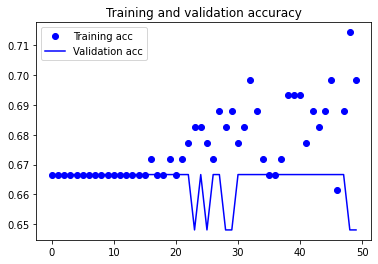

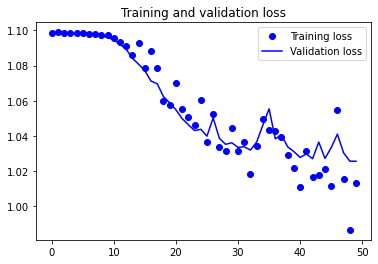

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()